In [1]:
import pandas as pd
about_game=pd.read_csv('game_form.csv')
TEST_VALUE=0.2

In [2]:
# fixing the cards to be the sum of red and yellow
red_card=['מספר הכרטיסים האדומים לקבוצת המתארחת','מספר הכרטיסים האדומים לקבוצת הבית']
yellow_card=['מספר הכרטיסים הצהובים לקבוצת הבית','מספר הכרטיסים הצהובים לקבוצת המתארחת']
about_game['total_red_card']=about_game[red_card].sum(axis=1)
about_game['total_yellow_card']=about_game[yellow_card].sum(axis=1)

# geting the metta data on the game
game_meta=["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"]
violence_labels=[col for col in about_game if (col.startswith('רמת האלימות'))]
cards_labels=['total_red_card','total_yellow_card']
about_game=about_game[cards_labels+violence_labels+game_meta]


In [3]:
# fixing the events level to bins to to event level
# mapping to bins
def bin_map(x):
    if not pd.isnull(x):
        if x>0 and x<4:
            return 1.0
        else:
            return 2.0
    return 0.0

# mapping all null levels to 0
def value_map(x):
    if pd.isnull(x):
        return 0.0
    return x

about_game[violence_labels]=about_game[violence_labels].applymap(value_map)

# droping a game without events
about_game=about_game[about_game[violence_labels].sum(axis=1)!=0]

In [4]:
## start working on the groups merge ##
## function that fixing the group name
groups_names=['בני_סכנין','ביתר_ירושלים','מכבי_תל_אביב','מס_אשדוד','הפועל_חיפה','מכבי_פתח_תקווה','קרית_שמונה','הפועל_אשקלון','מכבי_נתניה','בני_יהודה','עכו','באר_שבע','רעננה','מכבי_חיפה','נס_ציונה','רמת_גן' ,'נצרת']
def fixer(x):
    if (x in ['בית"ר ירושלים','ביתר ','ביתר ירושלים','בית"ר','בית"ר ','ביתר','בית"ר ירושלים ']):
        return groups_names[1]
    elif (x in ['מכבי תל אביב','מכבי ת"א']):
        return groups_names[2]
    elif (x in ['בני סכנין','בי סכנין','סכנין']):
        return groups_names[0]
    elif (x in ['מ.ס. אשדוד','אשדוד','מ.ס אשדוד','מס אשדוד','מ. ס. אשדוד','מ.ס.ע אשדוד','מ.ס. אשדוד ']):
        return groups_names[3]
    elif (x in ['הפועל חיפה','הפועל חיפה ','הפעול חיפה','פועל חיפה']):
        return groups_names[4]
    elif (x in ['מכבי פתח תקווה','מכבי פ"ת','מכבח פתח תקווה','מכבי פתח','מכבי  פתח תקווה','פתח תקווה','מכבי פתח תקוה','מכבי פ.ת.','מכבי פ.ת', 'מכבי פ.ת. ']):
        return groups_names[5]
    elif (x in ['קרית שמונה','הפועל קריית שמונה','עירוני קריית שמונה','עירוני קרית שמונה','הפועל קרית שמונה','עירוני ק"ש ','הפועל ק"ש','עירוני ק"ש','קריית שמונה']):
        return groups_names[6]
    elif (x in ['הפועל אשקלון','אשקלון ']):
        return groups_names[7]
    elif (x in ['מכבי נתניה','מכבי נתניה ','נתניה']):
        return groups_names[8]
    elif (x in ['בני יהודה תל אביב','בני יהודה','בני יהודה ת"א']):
        return groups_names[9]
    elif (x in ['הפועל עכו','עכו','הפועל עכן']):
        return groups_names[10]
    elif (x in ['באר שבע','הפועל באר שבע','הפועל ב"ש','הפועל ב"ש ']):
        return groups_names[11]
    elif (x in ['הפועל רעננה']):
        return groups_names[12]
    elif (x in ['מכבי חיפה ','מכבי חיפה']):
        return groups_names[13]
    return x

about_game[['שם קבוצה אורחת','שם קבוצה מארחת']]=about_game[['שם קבוצה אורחת','שם קבוצה מארחת']].applymap(fixer)

#all name of groups
groups_value_in_label=pd.unique(about_game[['שם קבוצה אורחת','שם קבוצה מארחת']].values.ravel())


In [5]:
# make sure each game as only one label,after we fixed the groups name
# if there is drop the last the was given
print ("Total size of labels When loaded = "+str(about_game[["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"]].count()[0]))
about_game=about_game.drop_duplicates(subset=["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"], keep="first")
assert(about_game[["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"]].duplicated().sum()==0)
print ("Total size of labels after droping duplicate = "+str(about_game[["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"]].count()[0]))


Total size of labels When loaded = 81
Total size of labels after droping duplicate = 79


In [6]:
#loading all the execel file
from os import listdir,path

mypath='facebook_set/'
dataframes=[]
for filename in listdir(mypath):
    if  'xlsx' in filename:
        current=pd.read_excel(path.join(mypath,filename))
        dataframes.append(current)
        print("loading: "+str(path.join(mypath,filename))+" with size= "+str(current.shape))
    
excels= pd.concat(dataframes,ignore_index=True, join='outer',sort=False)
print ("Total Number of samples = "+str(excels['מועד המשחק'].count()))
excels=excels.drop('Unnamed: 68',axis=1)

loading: facebook_set/hifa.xlsx with size= (36, 101)
loading: facebook_set/ranana.xlsx with size= (33, 101)
loading: facebook_set/מכבי חיפה ליגת העל.xlsx with size= (33, 101)
loading: facebook_set/משחקים של ביתר.xlsx with size= (37, 101)
loading: facebook_set/עותק של פתח תקווה כדורגל -.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים בני סכנין.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים הפועל אשקלון.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים מ.ס. אשדוד.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים מכבי נתניה.xlsx with size= (36, 101)
loading: facebook_set/קובץ ריכוז נתונים - מכבי תל אביב עונה 17-18.xlsx with size= (36, 100)
loading: facebook_set/קובץ ריכוז נתונים בני יהודה עונה 17-18.xlsx with size= (36, 100)
loading: facebook_set/קובץ ריכוז נתונים הפועל עכו עונה 17 18.xlsx with size= (32, 100)
loading: facebook_set/קובץ ריכוז נתונים- קרית שמונה כדורגל.xlsx with size= (33, 101)
loading: facebook_set/ריכוז נתונים הפועל באר שבע 17

In [7]:
# drop the column that not needed 
excels.drop(columns='שעה',inplace=True)

In [8]:
# fixing all the teams name
excels[['מארחת','אורחת']]=excels[['מארחת','אורחת']].applymap(fixer)


In [9]:
# removeing groups that aren't in this leage
groups_value_in_data=pd.unique(excels[['מארחת','אורחת']].values.ravel())
remove=[item for item in groups_value_in_data if item not in groups_value_in_label]
print("groups not in this track = "+str(remove))
excels=excels[~excels['מארחת'].isin(remove)]
excels=excels[~excels['אורחת'].isin(remove)]
print ("Total size is now= "+str(excels['מועד המשחק'].count()))


groups not in this track = ['הפועל פ"ת', 'מאריבור', 'לוגאנו', 'ויקטוריה פלזן', 'סטיאווה בוקרשט', 'אחי נצרת', 'הפועל רמת גן']
Total size is now= 480


In [10]:
# fixing dates
excels['מועד המשחק']=pd.to_datetime(excels['מועד המשחק'],format='%d-%m-%Y')
about_game['תאריך המשחק']=pd.to_datetime(about_game['תאריך המשחק'],format='%d/%m/%Y')

#fixing columns names to be the same
about_game.rename({'תאריך המשחק': 'מועד המשחק','שם קבוצה אורחת': 'אורחת', 'שם קבוצה מארחת': 'מארחת'}, axis='columns',inplace=True)


In [11]:
# removeing all rows that doen't occurrences twice
count_series=excels.groupby(['אורחת','מארחת','מועד המשחק']).size()
excel_occer_count=count_series.to_frame(name = 'size').reset_index()
excel_with_occer=pd.merge(excels, excel_occer_count, how='outer',on=['אורחת','מארחת','מועד המשחק'])
excels=excel_with_occer[excel_with_occer['size']==2].drop('size',axis=1)
print ("After droping rows that not apper twice= "+str(excels['מועד המשחק'].count()))


After droping rows that not apper twice= 412


In [12]:
# if two rows cover the same game, join them the one , then take the second row (the first and last will be on the same index)
# from diffrent vectors for two groups in the same match to a single vector contain both of the group vectors #
assert(excels.shape[1]==99)
excels=pd.merge(excels, excels, on=['אורחת','מארחת','מועד המשחק'])
excels=excels.groupby(['אורחת','מארחת','מועד המשחק'], as_index=False).apply(lambda x: x if len(x)==1 else x.iloc[[-2]]).reset_index(level=0, drop=True)
assert(excels.shape[1]==195)
print ("after merge size is = "+str(excels['מועד המשחק'].count()))
assert(excels.shape[0]*2==412)

after merge size is = 206


In [13]:
# print the games without vectors, but without labels
facebok_and_label=pd.merge(excels,about_game,how='left',on=['אורחת','מארחת','מועד המשחק'])
games_outwith_label=facebok_and_label.loc[facebok_and_label.loc[:,violence_labels].isnull().any(axis=1)][['מארחת','אורחת','מועד המשחק']]
print("Number of games droped do to missing label= "+str(games_outwith_label['מועד המשחק'].count()))
games_outwith_label.to_csv(encoding='utf-8',path_or_buf='vectors_with_missing_labels.csv')

Number of games droped do to missing label= 144


In [14]:
# merge with label raw data 
final_df=facebok_and_label.loc[~facebok_and_label.loc[:,violence_labels].isnull().any(axis=1)]
print("number of samples= "+str(final_df.shape[0]) +" number of features= "+str(final_df.shape[1]) )
assert(final_df.shape[1]==(195+9+2)) # feature before + violance + crads


number of samples= 62 number of features= 206


In [15]:
# remove all nan, and check this

import numpy as np
from MyTools import remove_all_null

final_df,droped_rows=remove_all_null(final_df)

Number of smaples that was removed becuse they contain 'NaN' =7


In [16]:
# all rows with a null values
droped_rows.to_csv(encoding='utf-8',path_or_buf='vector_with_labels_but_missing_values.csv')
#droped_rows.head()

In [17]:
# SORT AND THEN DROP non numric values (group names,date)
def sort_and_drop(final_df):
    final_df=final_df.sort_values(by='מועד המשחק') 
    final_df=final_df._get_numeric_data()
    return final_df

final_df=sort_and_drop(final_df)
assert(final_df.shape[1]==203)
assert(final_df.shape[0]==55)


In [18]:
from MyTools import build_scale,sacle

In [19]:
# getting for each game the violance events level and the number of tickets
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt


In [20]:
#build the vectors that will be used in the clustering
classtering_violece_data=final_df[cards_labels+violence_labels]

# build the vectors that will be the pradicating features
facebook_values=final_df.drop(cards_labels+violence_labels, axis=1)


# our original level
max_violence=final_df.loc[:,violence_labels].max(axis=1)
print("number of samples are= "+str(facebook_values.shape[0]) +" with number of features= "+str(facebook_values.shape[1]))
assert(facebook_values.shape[1]==96*2)

number of samples are= 55 with number of features= 192


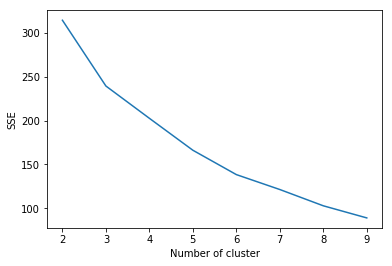

In [21]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
dis={}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit(classtering_violece_data)
    dis[i]=cluster_labels.inertia_
plt.figure()
plt.plot(list(dis.keys()), list(dis.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# the plot indicate 4 clusters

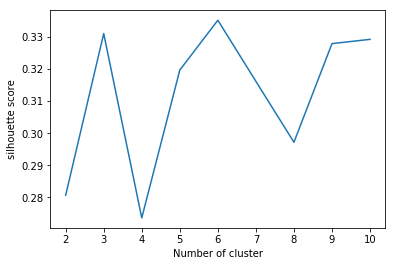

In [22]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
# need to look on the peak
sil_coeff={}
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(classtering_violece_data)
    label = kmeans.labels_
    sil_coeff[n_cluster] = silhouette_score(classtering_violece_data, label, metric='euclidean')
plt.figure()
plt.plot(list(sil_coeff.keys()), list(sil_coeff.values()))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette score")
plt.show()
# the plot indicate 2 clusters


In [23]:
#so, we need to choose between 2 and 4 and 6 (our function) clusters
# we will draw them both and decaid


# acording to the elbow method 
kmeans2= KMeans(n_clusters=2).fit_predict(classtering_violece_data)
# acording to the silhouette score
kmeans4 = KMeans(n_clusters=4).fit_predict(classtering_violece_data)
# acording to the number of class we deceide
kmeans3 = KMeans(n_clusters=3).fit_predict(classtering_violece_data)

In [24]:
# pca to draw the data 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clf=pca.fit(facebook_values)
pca_data=clf.fit_transform(facebook_values)
# reseting the index of facebook_value tp addres pca indexs
max_to_pca=max_violence.reset_index(drop=True)


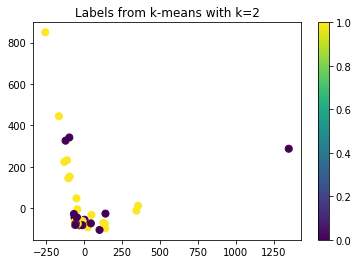

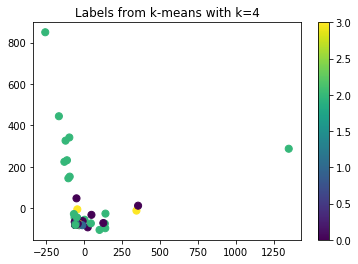

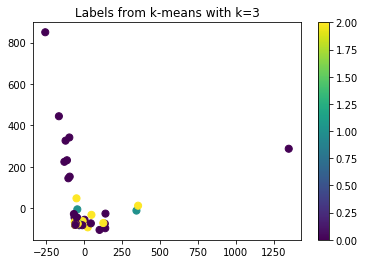

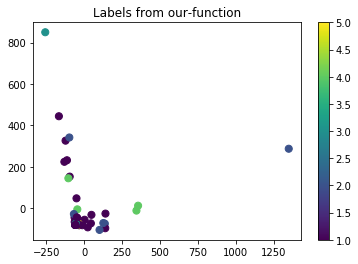

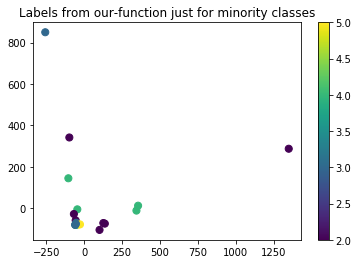

In [25]:
plt.figure(1)
plt.title('Labels from k-means with k=2')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans2,
            s=50, cmap='viridis');
cb = plt.colorbar()

plt.figure(2)

plt.title('Labels from k-means with k=4')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans4,
            s=50, cmap='viridis');
cb = plt.colorbar()

plt.figure(3)

plt.title('Labels from k-means with k=3')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans3,
            s=50, cmap='viridis');
cb = plt.colorbar()


plt.figure(4)
plt.title('Labels from our-function')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=max_violence,
            s=50, cmap='viridis');
cb = plt.colorbar()

plt.figure(5)
plt.title('Labels from our-function just for minority classes')
plt.scatter(pca_data[max_to_pca[max_to_pca!=1].index,0], pca_data[max_to_pca[max_to_pca!=1].index,1], c=max_to_pca[max_to_pca!=1],
           s=50, cmap='viridis');
cb = plt.colorbar()

In [26]:
# write to csv the cluster selection
clusters_compare=pd.concat([final_df,pd.DataFrame(data=kmeans2,columns=['kmeans2']),pd.DataFrame(data=kmeans4,columns=['kmeans4']),pd.DataFrame(data=kmeans3,columns=['kmeans3'])],axis=1)
clusters_compare.head()
clusters_compare.to_csv(encoding='utf-8',path_or_buf='clusters.csv')

In [27]:
from MyTools import overSampling,dup_dataset,overSampleAny,five_fold_avg_regresion


In [28]:
from MyTools import split_by_label,split_5_fold,five_fold_avg_classifction,five_fold_avg_regresion
from MyTools import custem_score,custem_score_ceil,custem_score_floor


In [29]:
from MyTools import plot_confusion_matrix,custem_score_ceil,custem_score_floor

In [30]:
from MyTools import regression_estimation,classification_estimation

In [31]:
# using the labels from the clustering with 6 clusters
#classification_estimation(facebook_values.values, kmeans3,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 1.014542133249525
radom_forest - avg score with normal rmse = 0.9919030550401982
nn - avg score with normal rmse = 11.294807400679828
------------------------------


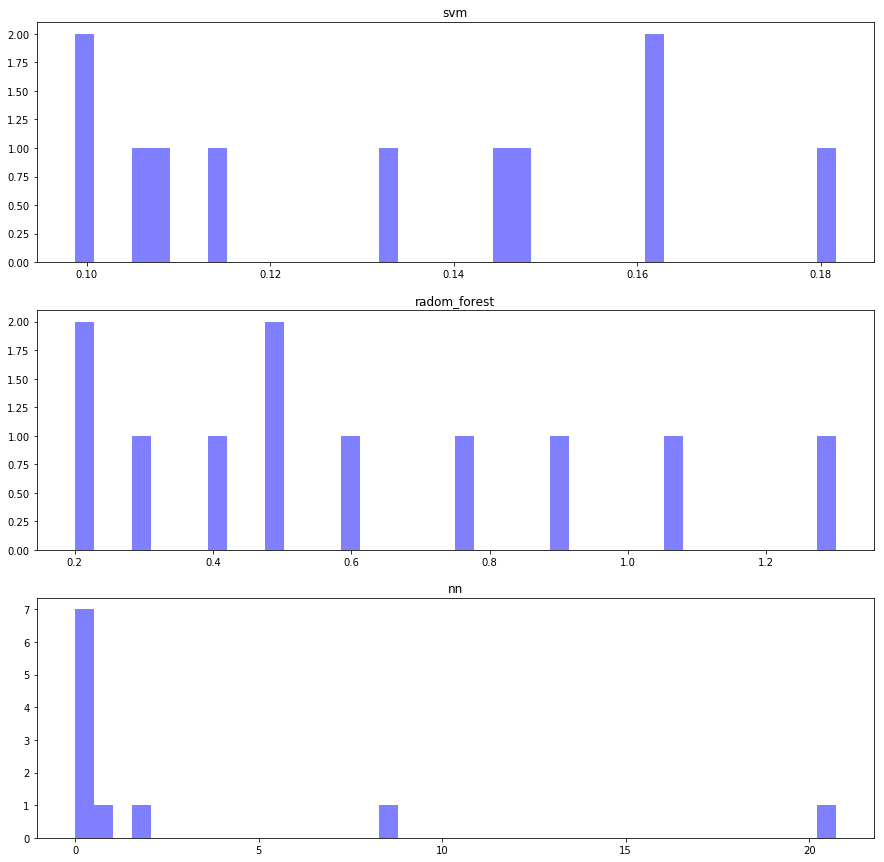

In [32]:
regression_estimation(facebook_values.values, kmeans3,TEST_VALUE)


----------classification------
svm_ovo - mean accuracy is= 0.3230769230769231
svm_ovo - avg auc score is= 4.2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.3076923076923077
svm_ovr - avg auc score is= 4.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.43076923076923074
radom_forest - avg auc score is= 4.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.2923076923076923
nn - avg auc score is= 3.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


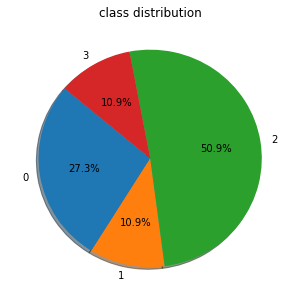

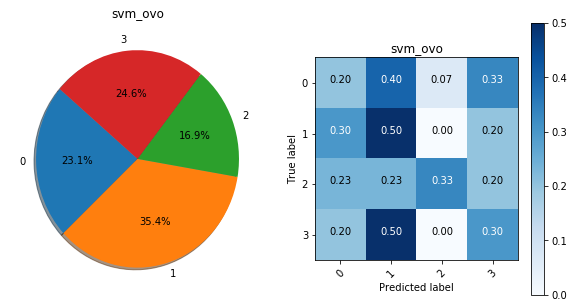

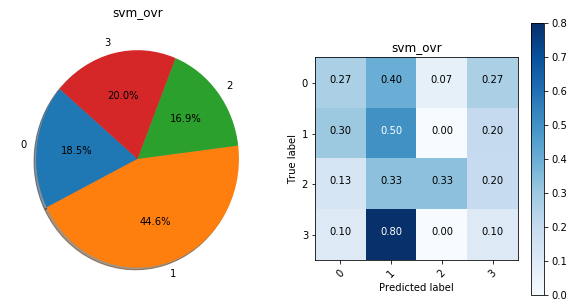

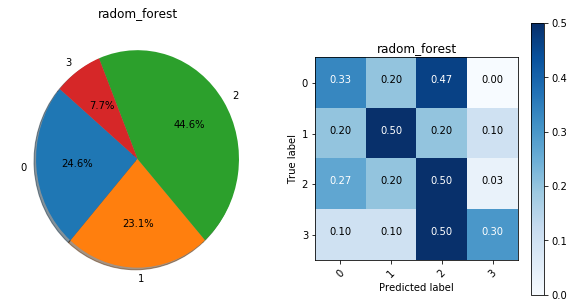

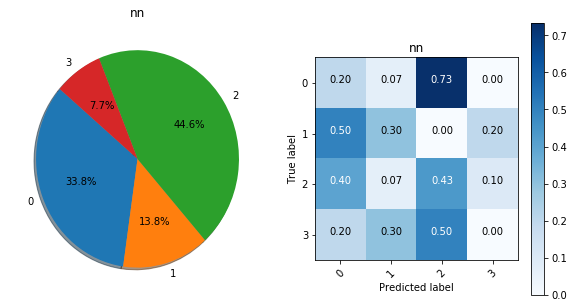

In [33]:
#calssifaction, using the labels from the clustering with 4 clusters 
classification_estimation(facebook_values.values, kmeans4,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 1.180249048982553
radom_forest - avg score with normal rmse = 1.1646485528756958
nn - avg score with normal rmse = 9.407372864014572
------------------------------


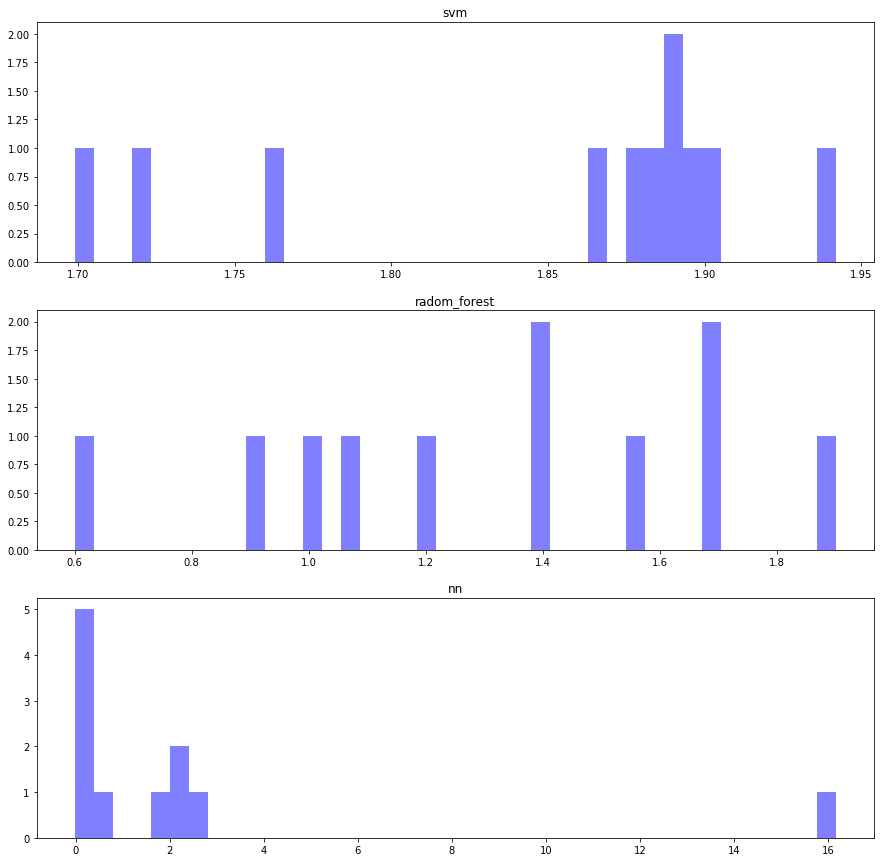

In [34]:
regression_estimation(facebook_values.values, kmeans4,TEST_VALUE)

----------classification------
svm_ovo - mean accuracy is= 0.4666666666666667
svm_ovo - avg auc score is= 0.5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.4333333333333333
svm_ovr - avg auc score is= 0.6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.4
radom_forest - avg auc score is= 0.4
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.6
nn - avg auc score is= 0.8
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


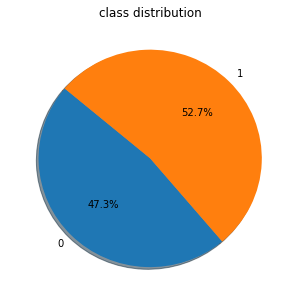

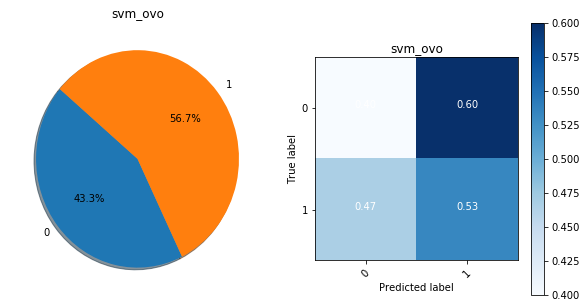

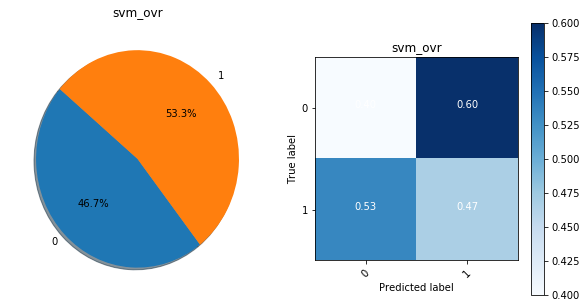

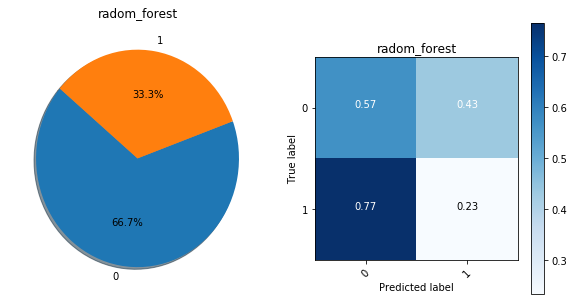

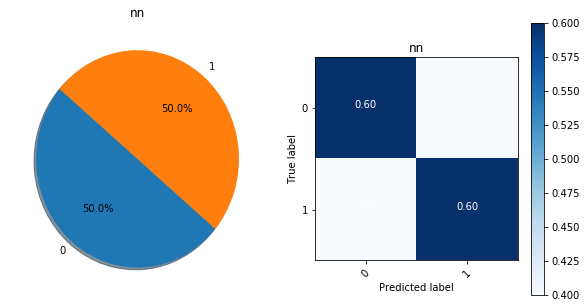

In [35]:
# using the labels from the clustering with 2 clusters
classification_estimation(facebook_values.values, kmeans2,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 0.3419721607352256
radom_forest - avg score with normal rmse = 0.2977456256441971
nn - avg score with normal rmse = 2.3170170395097704
------------------------------


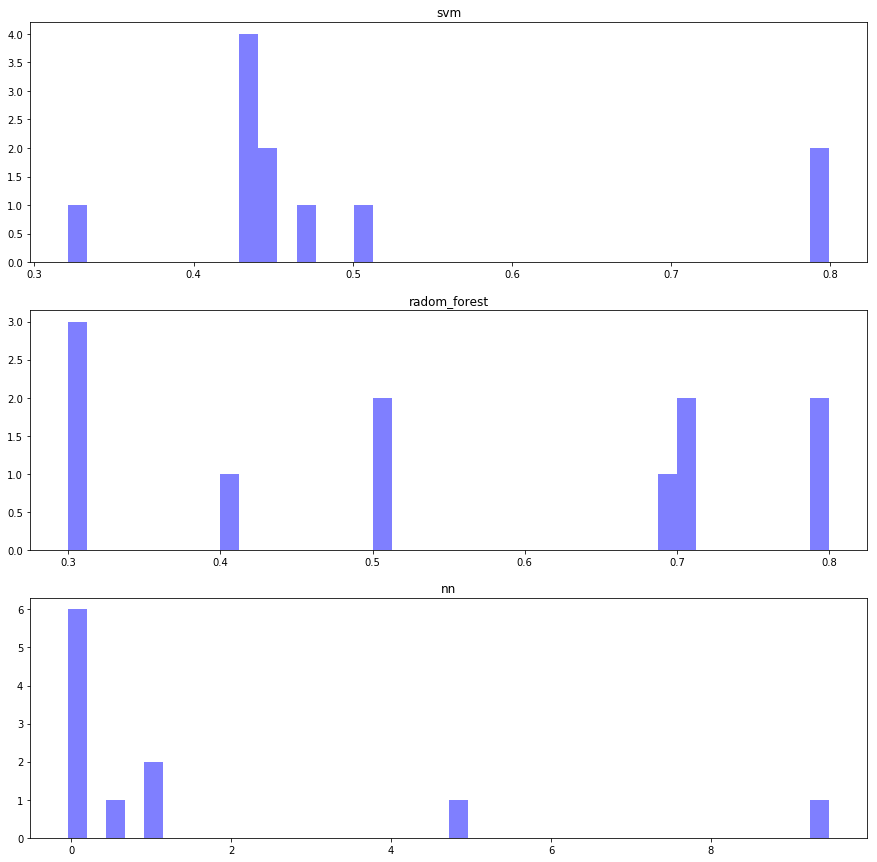

In [36]:
regression_estimation(facebook_values.values, kmeans2,TEST_VALUE)

----------classification------
svm_ovo - mean accuracy is= 0.27692307692307694
svm_ovo - avg auc score is= 14.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.15384615384615388
svm_ovr - avg auc score is= 13.6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.35384615384615387
radom_forest - avg auc score is= 6.6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.3384615384615385
nn - avg auc score is= 6.7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


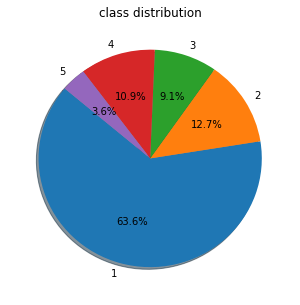

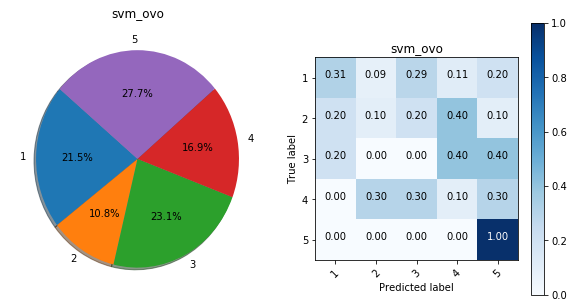

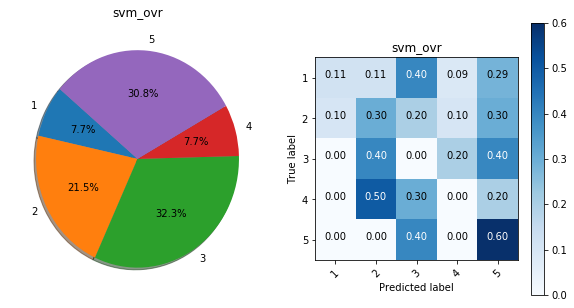

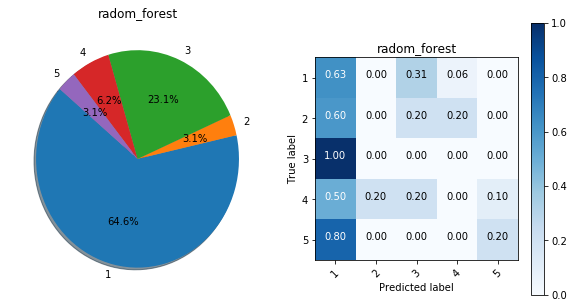

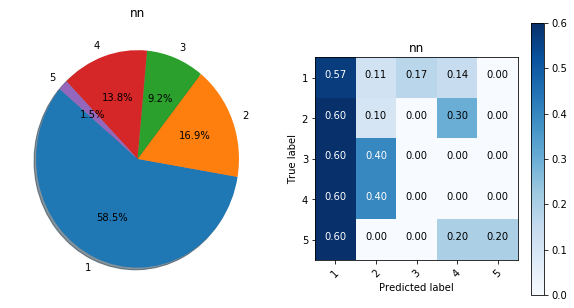

In [37]:
# tring to preform a regression to the max of the level of violance
classification_estimation(facebook_values.values, max_violence.values,TEST_VALUE)
#facebook_values.shape

---------- regression---------
svm - avg score with normal rmse = 1.8098682116671465
radom_forest - avg score with normal rmse = 1.7115999175427745
nn - avg score with normal rmse = 20.284201755451157
------------------------------


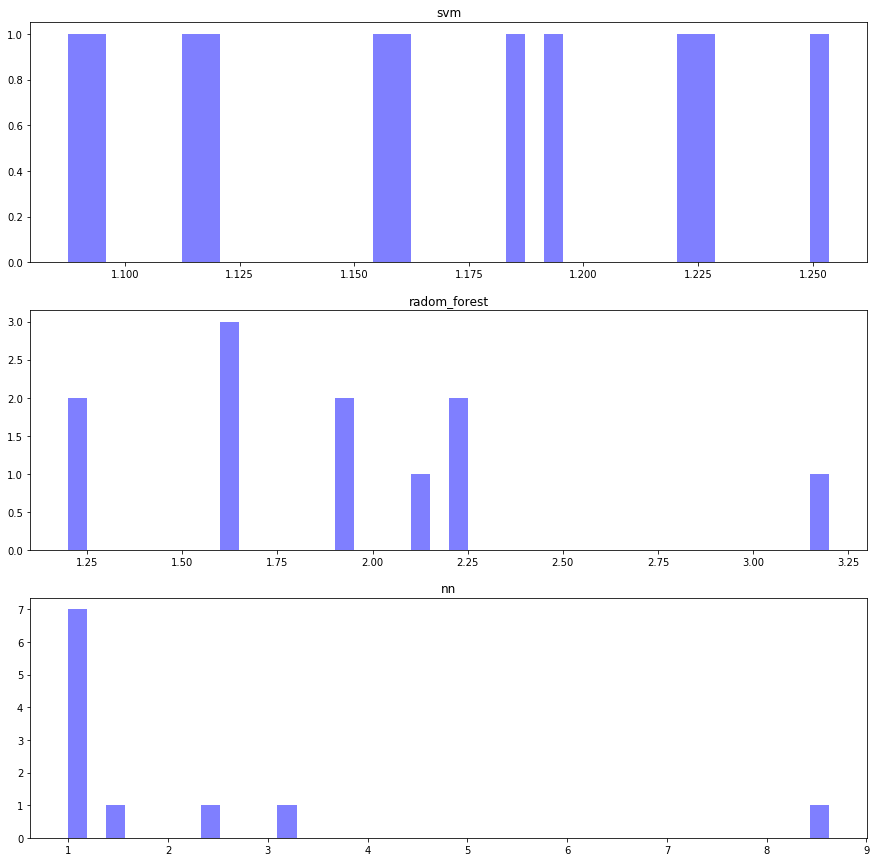

In [38]:
regression_estimation(facebook_values.values, max_violence.values,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 5.69262954605354
radom_forest - avg score with normal rmse = 7.038413947639663
nn - avg score with normal rmse = 29.158281529529027
------------------------------


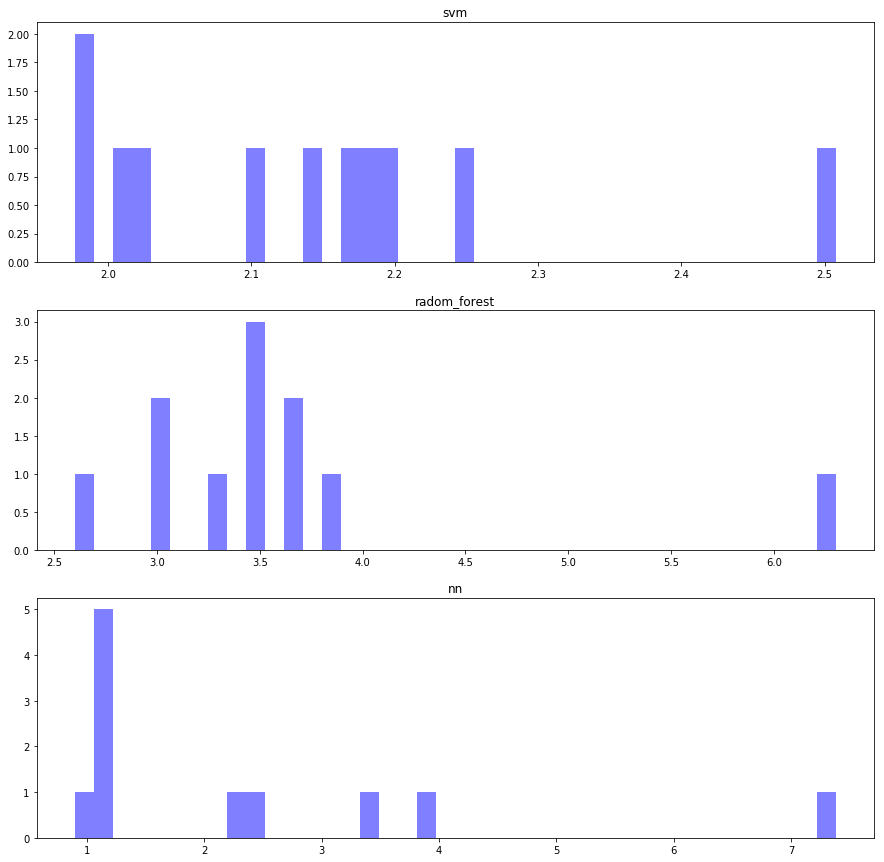

In [39]:
# tring to preform a regression to the sum of the level of violance
sum_violence=final_df.loc[:,violence_labels].sum(axis=1)
regression_estimation(facebook_values.values,sum_violence.values,TEST_VALUE)


----------classification------
svm_ovo - mean accuracy is= 0.16
svm_ovo - avg auc score is= 57.5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.14666666666666667
svm_ovr - avg auc score is= 61.9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.18666666666666668
radom_forest - avg auc score is= 22.6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.13333333333333336
nn - avg auc score is= 31.7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


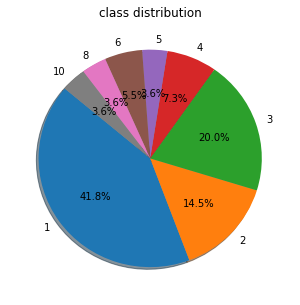

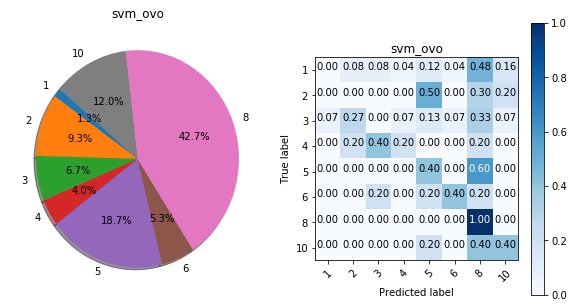

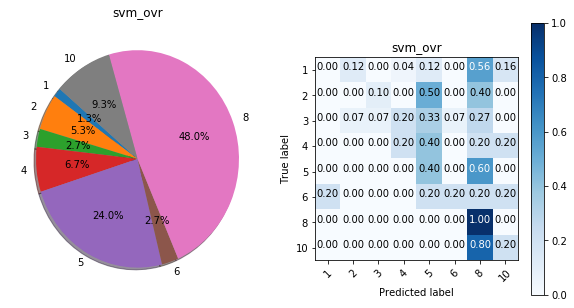

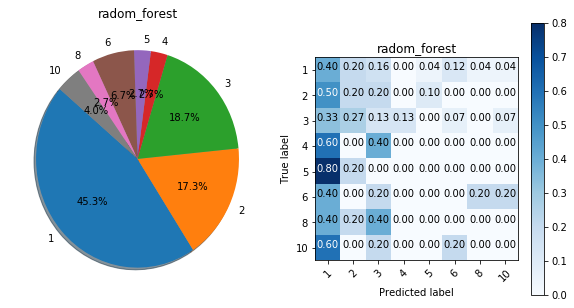

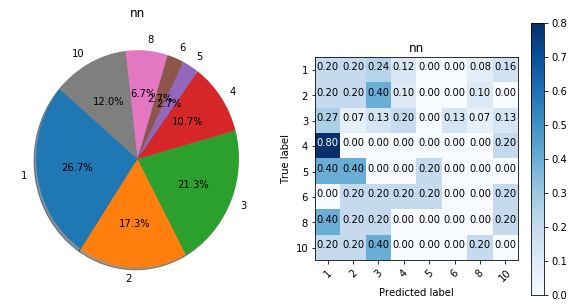

In [40]:
classification_estimation(facebook_values.values,sum_violence.values,TEST_VALUE)

---------- regression---------
svm - avg score with normal rmse = 0.0707205146745546
radom_forest - avg score with normal rmse = 0.09199339707225951
nn - avg score with normal rmse = 0.37593489574826455
------------------------------


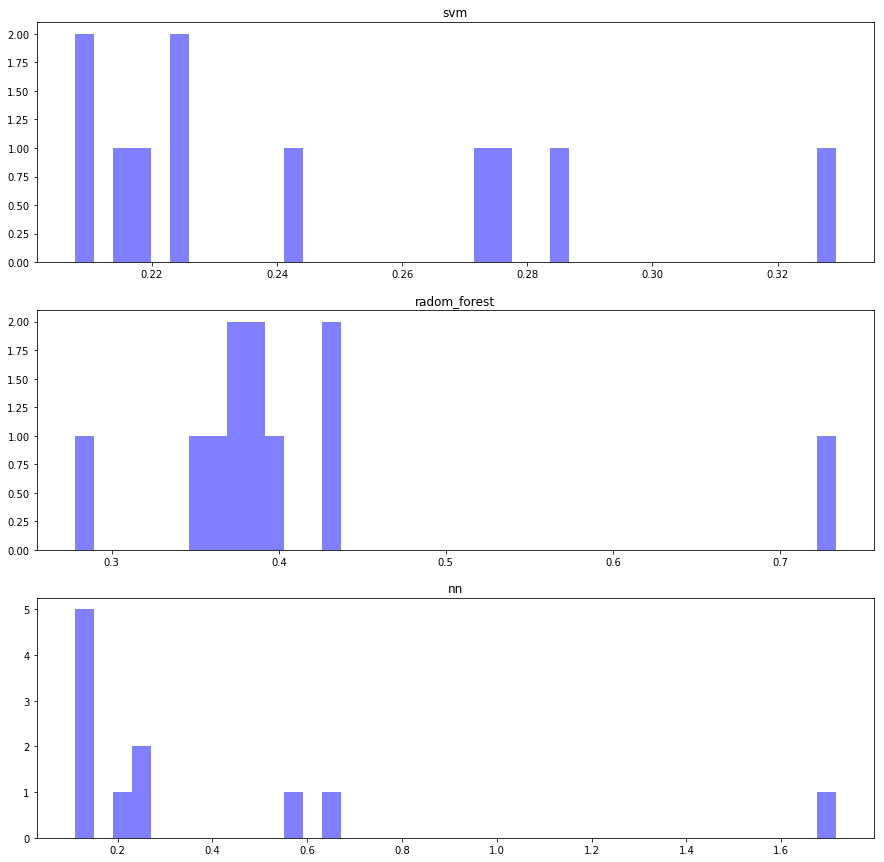

In [41]:
# tring to preform a regression to the mean of the level of violance
mean_violence=final_df.loc[:,violence_labels].mean(axis=1)
regression_estimation(facebook_values.values,mean_violence.values,TEST_VALUE)


----------classification------
svm_ovo - mean accuracy is= 0.17333333333333334
svm_ovo - avg auc score is= 76.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.17333333333333334
svm_ovr - avg auc score is= 77.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.26666666666666666
radom_forest - avg auc score is= 19.2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.12000000000000002
nn - avg auc score is= 37.6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


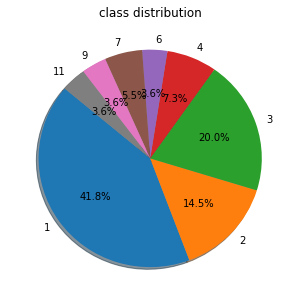

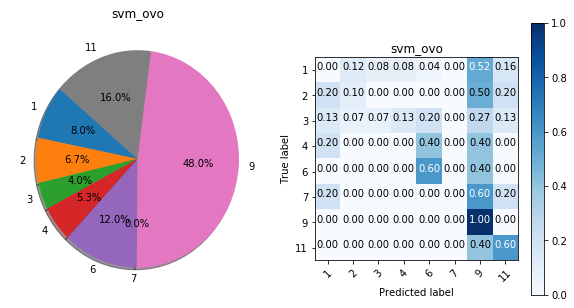

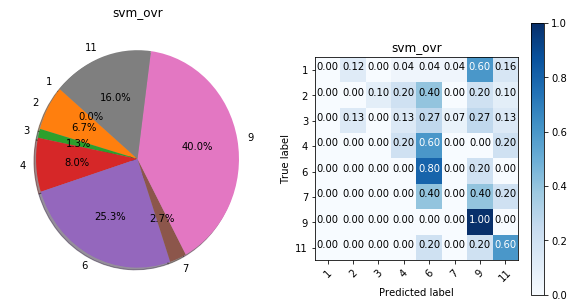

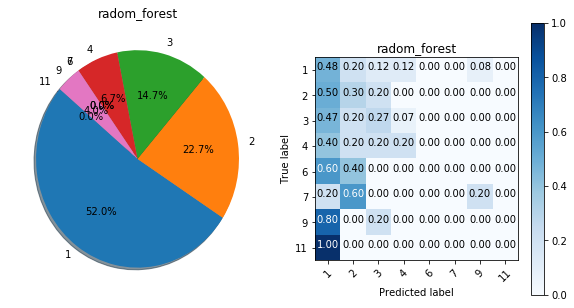

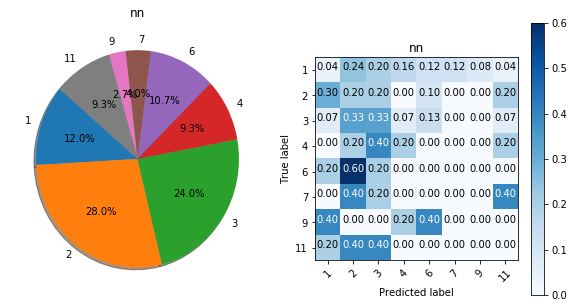

In [42]:
classification_estimation(facebook_values.values,np.round(mean_violence.map(lambda x: x*10).values),TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 1.948939089377138
radom_forest - avg score with normal rmse = 2.4999277866774734
nn - avg score with normal rmse = 15.348230079405488
------------------------------


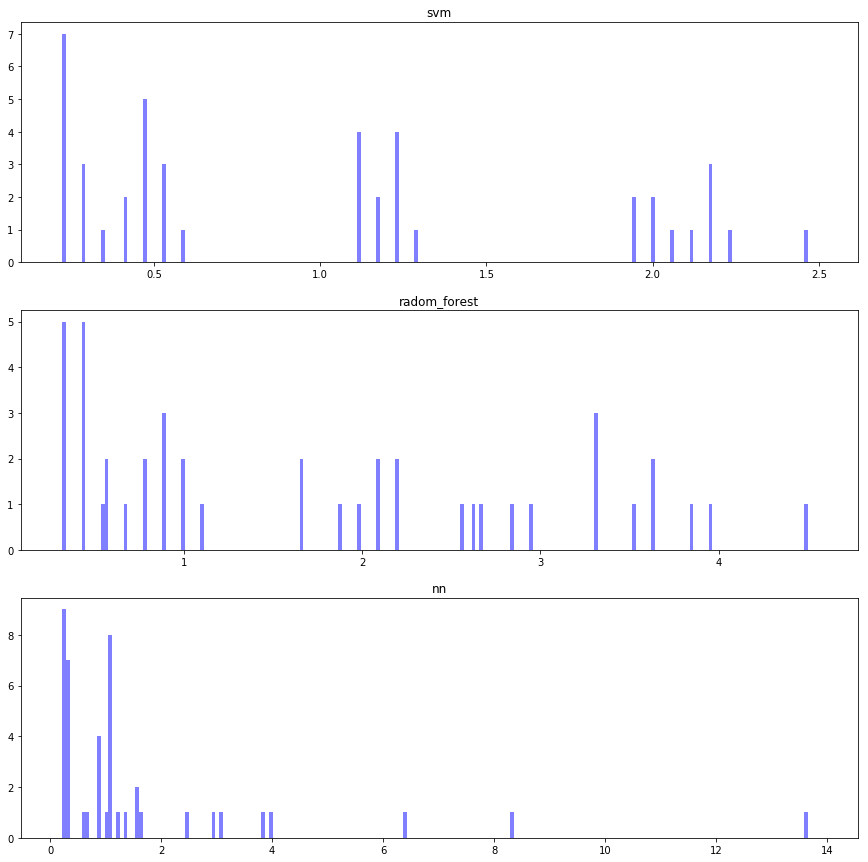

In [43]:
# tring to preform a regression to the statistical values of the level of violance
from MyTools import multi_regression_estimation
stat_labels=pd.DataFrame()
stat_labels['sum']=final_df.loc[:,violence_labels].sum(axis=1)
stat_labels['mean']=final_df.loc[:,violence_labels].mean(axis=1)
stat_labels['std']=final_df.loc[:,violence_labels].std(axis=1)
stat_labels['max']=final_df.loc[:,violence_labels].max(axis=1)
multi_regression_estimation(facebook_values.values,stat_labels.values,TEST_VALUE)

---------- regression---------
svm - avg score with normal rmse = 0.4329348097070372
radom_forest - avg score with normal rmse = 0.4753020412744222
nn - avg score with normal rmse = 1.1217901453799797
------------------------------


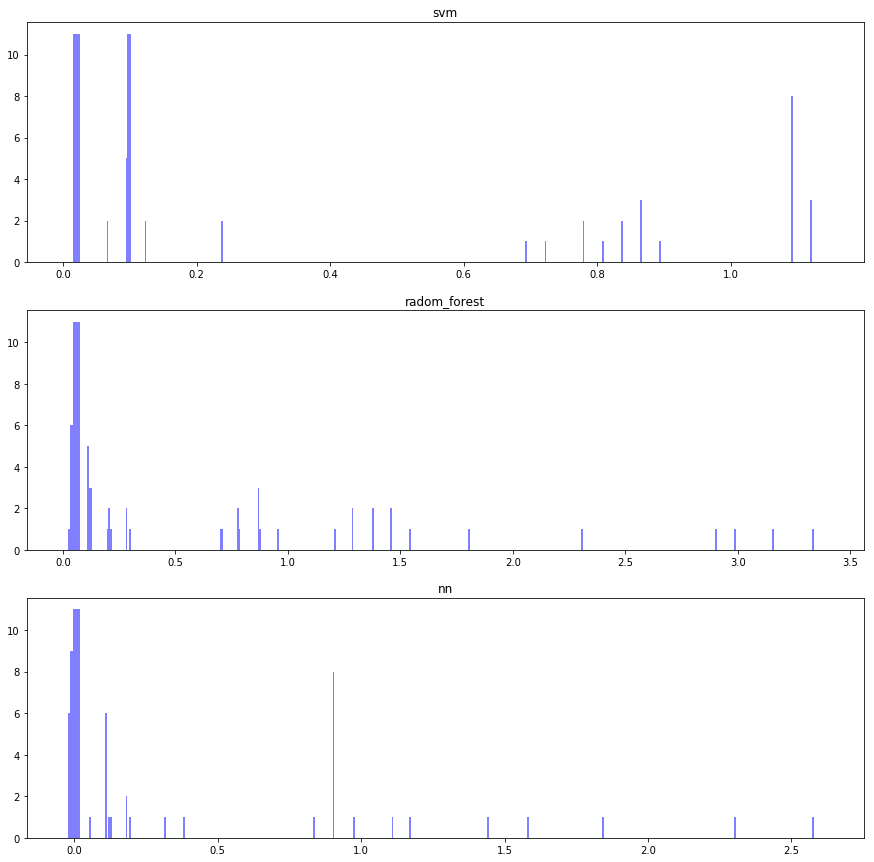

In [44]:
# tring to preforem a regression to the each event value
multi_regression_estimation(facebook_values.values,final_df.loc[:,violence_labels].values,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 2.5622302368305774
radom_forest - avg score with normal rmse = 2.7883097120439087
nn - avg score with normal rmse = 15.00995149615217
------------------------------


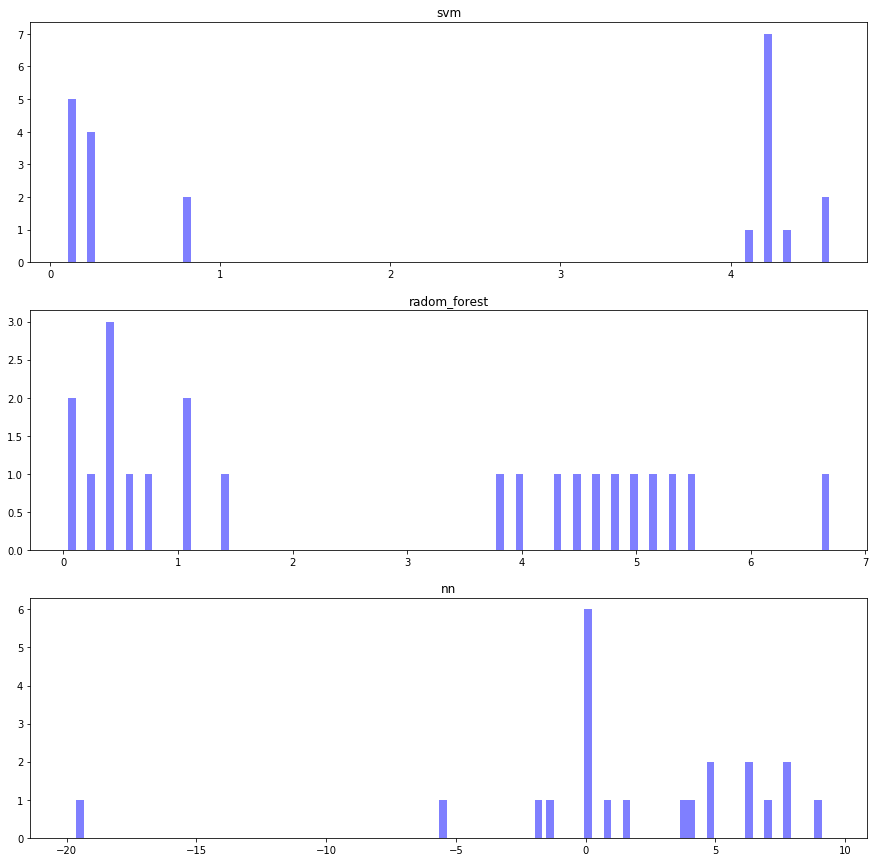

In [45]:
# tring to preforem a regression to the cards values
multi_regression_estimation(facebook_values.values,final_df.loc[:,cards_labels].values,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 0.8200794328204083
radom_forest - avg score with normal rmse = 0.8652065608075187
nn - avg score with normal rmse = 3.088179699625748
------------------------------


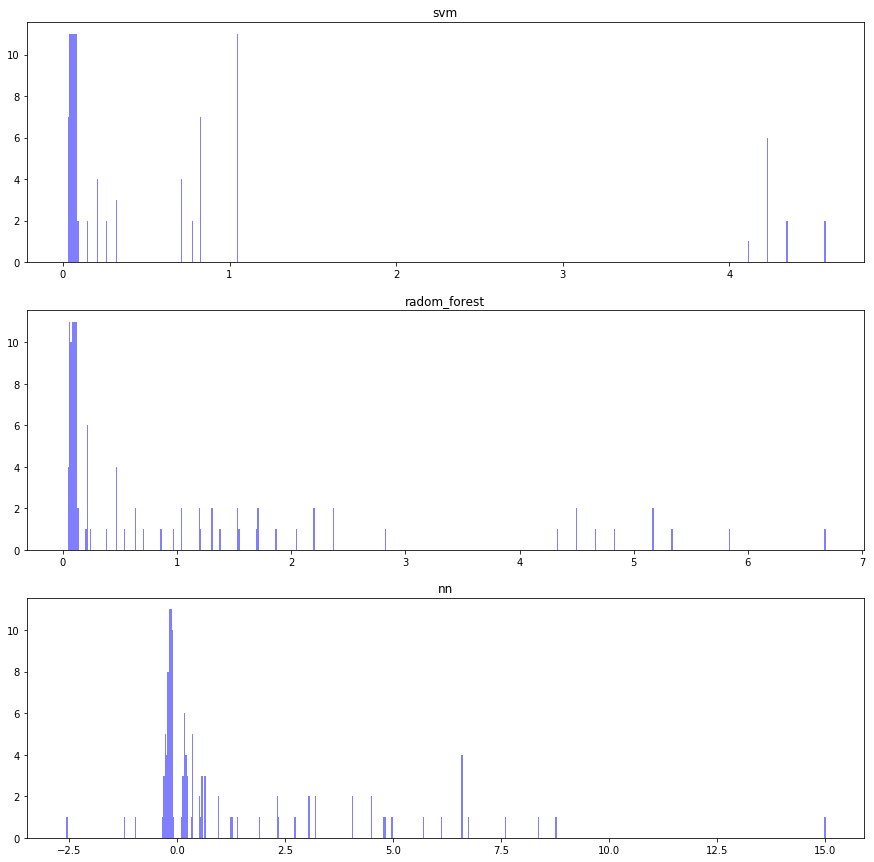

In [46]:
# tring to preforem a regression to the each event value + the cards values
multi_regression_estimation(facebook_values.values,final_df.loc[:,violence_labels+cards_labels].values,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 18.32662051202269
radom_forest - avg score with normal rmse = 18.28917487012987
nn - avg score with normal rmse = 219.65549460744123
------------------------------


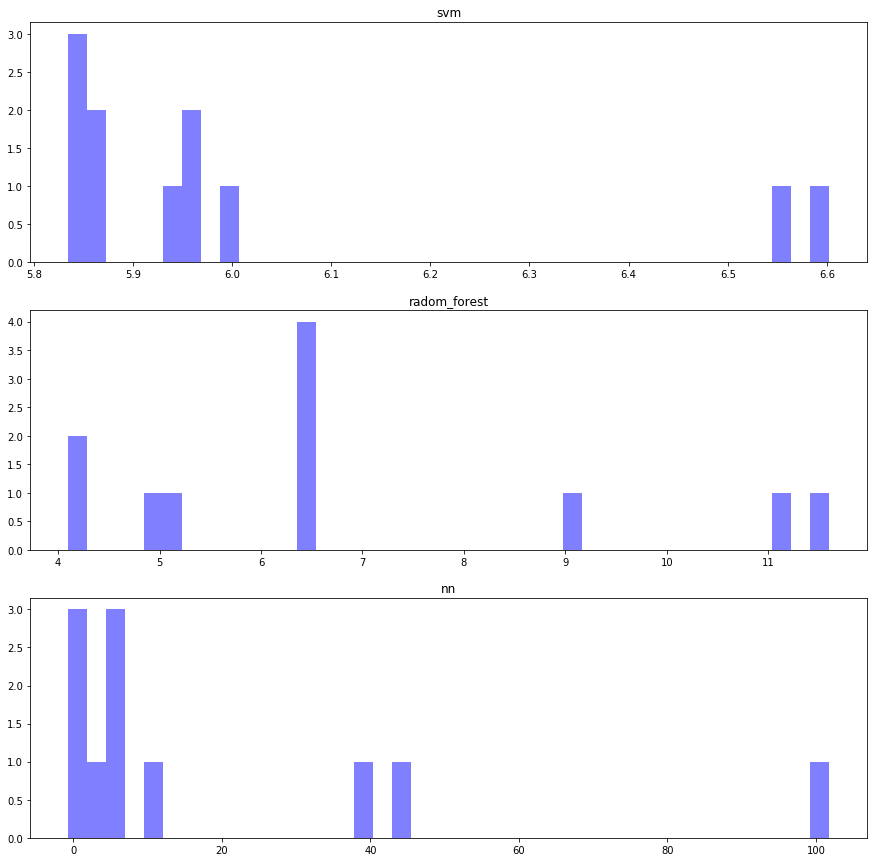

In [47]:
cards_data=final_df.loc[:,cards_labels]
cards_data['total_red_card']=cards_data['total_red_card'].apply(lambda x: 4*x)
regression_estimation(facebook_values.values,cards_data.sum(axis=1).values,TEST_VALUE)


----------classification------
svm_ovo - mean accuracy is= 0.1
svm_ovo - avg auc score is= 132.7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.06999999999999999
svm_ovr - avg auc score is= 134.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.06999999999999999
radom_forest - avg auc score is= 138.5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.1
nn - avg auc score is= 143.7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


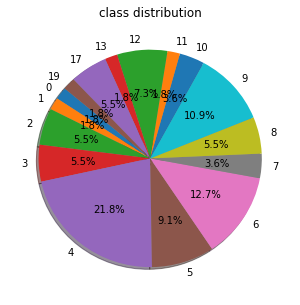

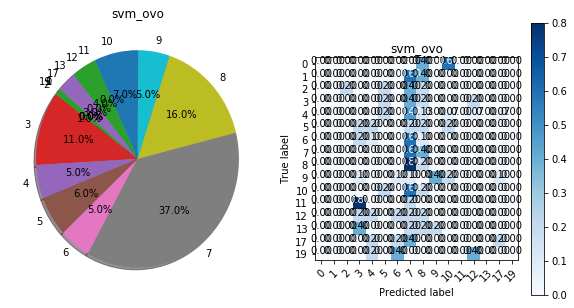

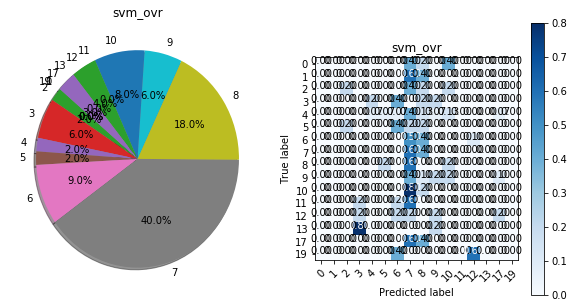

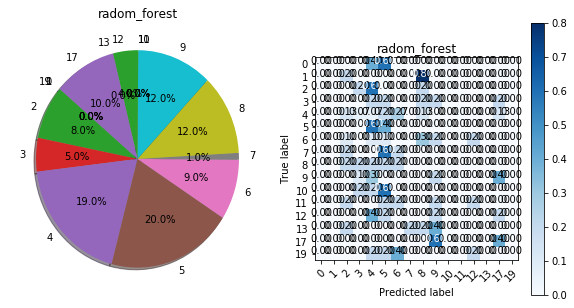

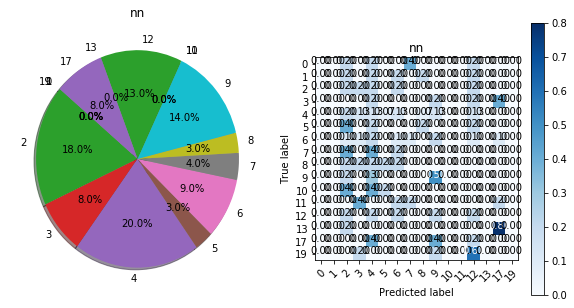

In [48]:
classification_estimation(facebook_values.values,cards_data.sum(axis=1).values,TEST_VALUE)


In [49]:

radio=pd.read_excel("radio.xlsx")

# take only talks about future games
fu_radio=radio[radio['האייטם היה על משחק:']=='עתידי']

#divide to colums group to make wotking esay
meta_data=['שם קבוצת בית:','שם קבוצת חוץ:','תאריך המשחק:']
boolean_cols=['ויכוח בין המרואיינים ?','האם במהלך האייטם הוטלה אחריות למתיחות או לאפשרות של אלימות ? ','האם במהלך האייטם נמתחה ביקורת על גורם כלשהו']
catagotial_col=['אפשרות לאלימות או עימות עלתה במהלך האייטם כ:','האם האייטם גלש ל (ניתן לסמן כמה):','האייטם הסתיים:']
numric_col=['כמות כינויי גנאי, עלבונות או הלעגות של מושא הביקורת הובעו במהלכה','מספר הרמות קול בולטות   ','מספר הפרת כללי דיון:','מספר האקטים של אלימות מילולית:','מספר הפעמים שבהם הוטחו האשמות באחד או יותר ממשתתפי הדיון:','מספר ההצהרות על ציפייה  או חשיבות של  האירוע:','מספר התייחסויות מפורשות לאפשרות של עימות או מתיחות:','מספר התייחסות מפורשת לאפשרות של התפרעות או אלימות פיסית:','מספר הבעות אמפתיה/הבנה לתסכול או כעס של אחד או יותר מהצדדים לעימות','מספר קריאות לפעולה למניעת אלימות:','מספר האייטם בין האייטם בתוכנית:','מספר המשתתפים באייטם:']
time_col=['משך הויכוח:','משך האייטם:']


# take the data
relevet_data=fu_radio[meta_data+boolean_cols+catagotial_col+numric_col+time_col]

# fix all null values in the numric values
relevet_data[numric_col]=relevet_data[numric_col].applymap(value_map)

# fix all null values in time  
relevet_data[time_col]=relevet_data[time_col].applymap(lambda x: '01/01/1970 00:00:00' if pd.isnull(x) else '01/01/1970 '+str(x))


# covert the time colums to numbers
for c in time_col:
    relevet_data.loc[:,c]=pd.to_datetime(relevet_data.loc[:,c],format='%d/%m/%Y %H:%M:%S')
    relevet_data.loc[:,c]=pd.to_numeric(relevet_data.loc[:,c])

# fixing all missing boolean values
relevet_data.loc[:,boolean_cols]=relevet_data.loc[:,boolean_cols].applymap(lambda x: 'לא' if pd.isnull(x) else x)
# fixing all missing catagorial  data
relevet_data.loc[:,catagotial_col]=relevet_data.loc[:,catagotial_col].applymap(lambda x: 'שום דבר' if pd.isnull(x) else x)


#fixing the name of the groups
relevet_data[['שם קבוצת בית:','שם קבוצת חוץ:']]=relevet_data[['שם קבוצת בית:','שם קבוצת חוץ:']].applymap(fixer)

# droping all groups not relevnt to this track
relevet_data=relevet_data[relevet_data['שם קבוצת חוץ:'].isin(groups_names)]
relevet_data=relevet_data[relevet_data['שם קבוצת בית:'].isin(groups_names)]

# parsing the game time
relevet_data.loc[:,'תאריך המשחק:']=pd.to_datetime(relevet_data.loc[:,'תאריך המשחק:'],format='%Y-%m-%d %H:%M:%S')

# make sure all features and meta-data taken
assert(len(relevet_data.columns)==23)

# handling catagorail data
relevet_data["האייטם הסתיים:"]=relevet_data["האייטם הסתיים:"].map({'באי הסכמה  בין  המשתתפים':0,'בהסכמה בין כל המשתתפים':1})
relevet_data.loc[:,boolean_cols]=relevet_data.loc[:,boolean_cols].applymap(lambda x: 0 if (x=="לא") else 1)
relevet_data["אפשרות לאלימות או עימות עלתה במהלך האייטם כ:"]=relevet_data["אפשרות לאלימות או עימות עלתה במהלך האייטם כ:"].map({'שום דבר':0,'כדרך אגב':1,'אחד הנושאים בדיון':2,'נושא מרכזי / פותח בדיון':3})
relevet_data["האם האייטם גלש ל (ניתן לסמן כמה):"]=relevet_data["האם האייטם גלש ל (ניתן לסמן כמה):"].map({'שום דבר':0,'ויכוח':1,'עימות קולני':2})




c:\python\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
# checking all meta-data is here

#relevet_data[relevet_data[meta_data].isna().any(axis=1)]
assert(relevet_data[meta_data].isna().sum().sum()==0)
# checking we fixed all the nan cases
assert(relevet_data.isna().sum().sum()==0)

In [51]:
# merging 
relevet_data.rename({'תאריך המשחק:': 'מועד המשחק','שם קבוצת חוץ:': 'אורחת', 'שם קבוצת בית:': 'מארחת'}, axis='columns',inplace=True)
final_df_rad=pd.merge(relevet_data,about_game,how='inner',on=['אורחת','מארחת','מועד המשחק'])
final_df_rad,removed=remove_all_null(final_df_rad)
final_df_rad=sort_and_drop(final_df_rad)


Number of smaples that was removed becuse they contain 'NaN' =0


In [52]:
# build the vectors that will be the pradicating features
radio_values=final_df_rad.drop(cards_labels+violence_labels, axis=1)


---------- regression---------
svm - avg score with normal rmse = 2.8657658941798037
radom_forest - avg score with normal rmse = 2.531833333333333
nn - avg score with normal rmse = 8.883539048638768
------------------------------


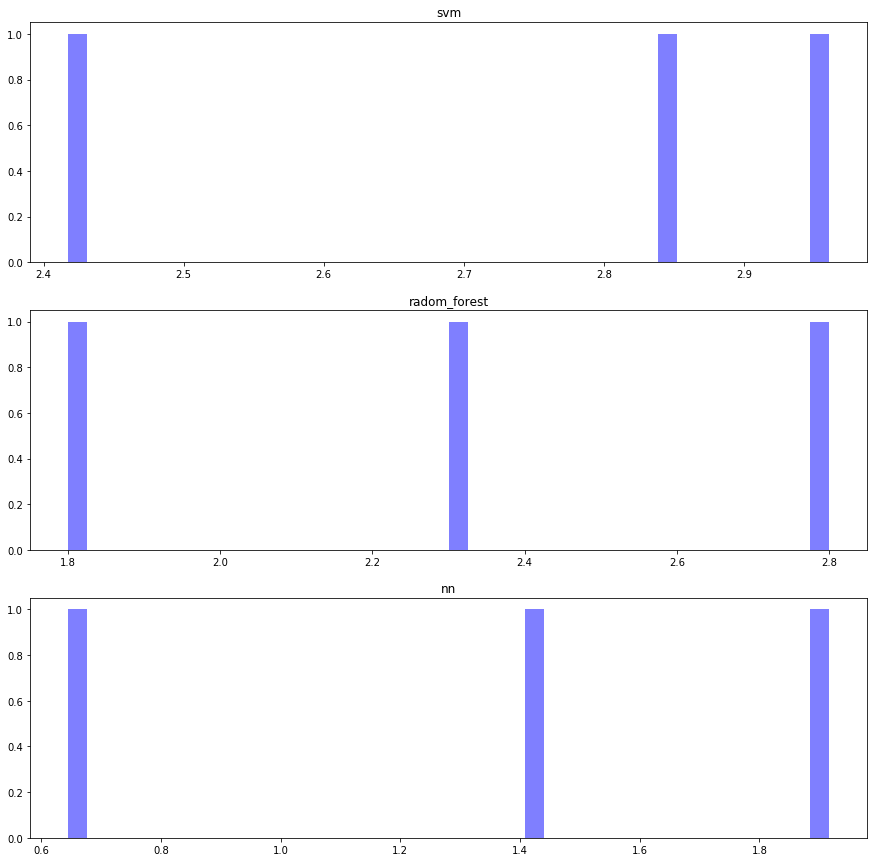

In [53]:
# tring to preform a regression to the max of the level of violance
max_violence=final_df_rad.loc[:,violence_labels].max(axis=1)
regression_estimation(radio_values.values, max_violence.values,TEST_VALUE)

----------classification------
svm_ovo - mean accuracy is= 0.42857142857142855
svm_ovo - avg auc score is= 10.9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.3714285714285714
svm_ovr - avg auc score is= 10.9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.2857142857142857
radom_forest - avg auc score is= 8.8
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.39999999999999997
nn - avg auc score is= 7.9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


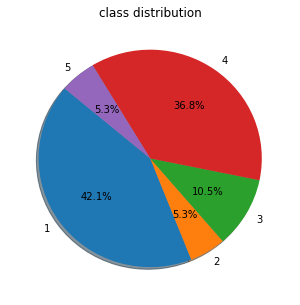

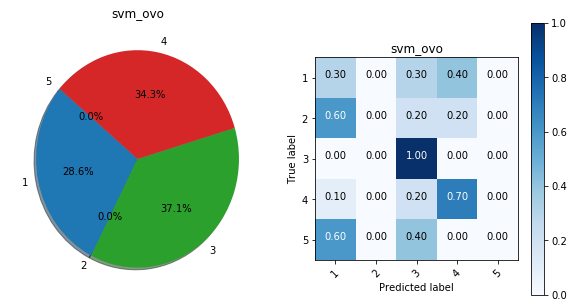

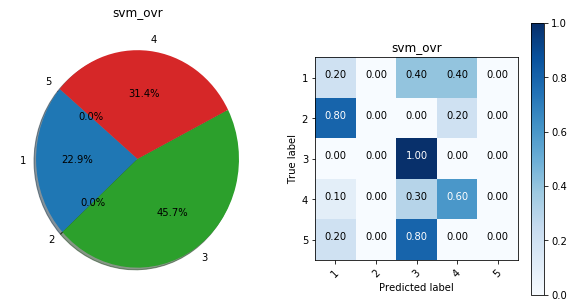

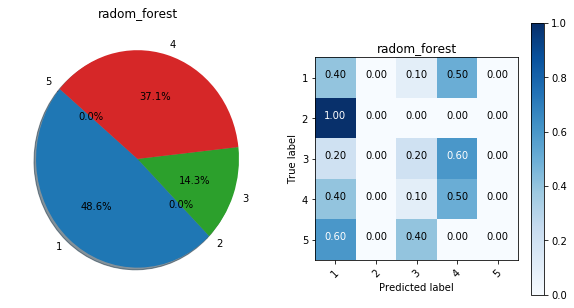

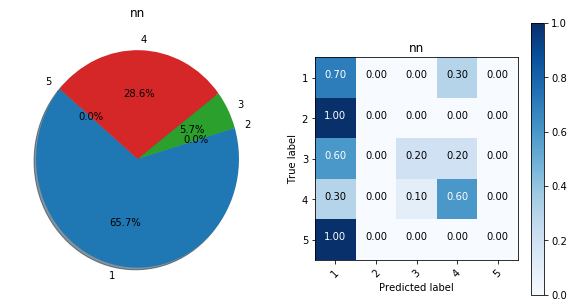

In [54]:
classification_estimation(radio_values.values, max_violence.values,TEST_VALUE)


---------- regression---------
svm - avg score with normal rmse = 0.07840895216145408
radom_forest - avg score with normal rmse = 0.11525514403292181
nn - avg score with normal rmse = 0.4770749044070032
------------------------------


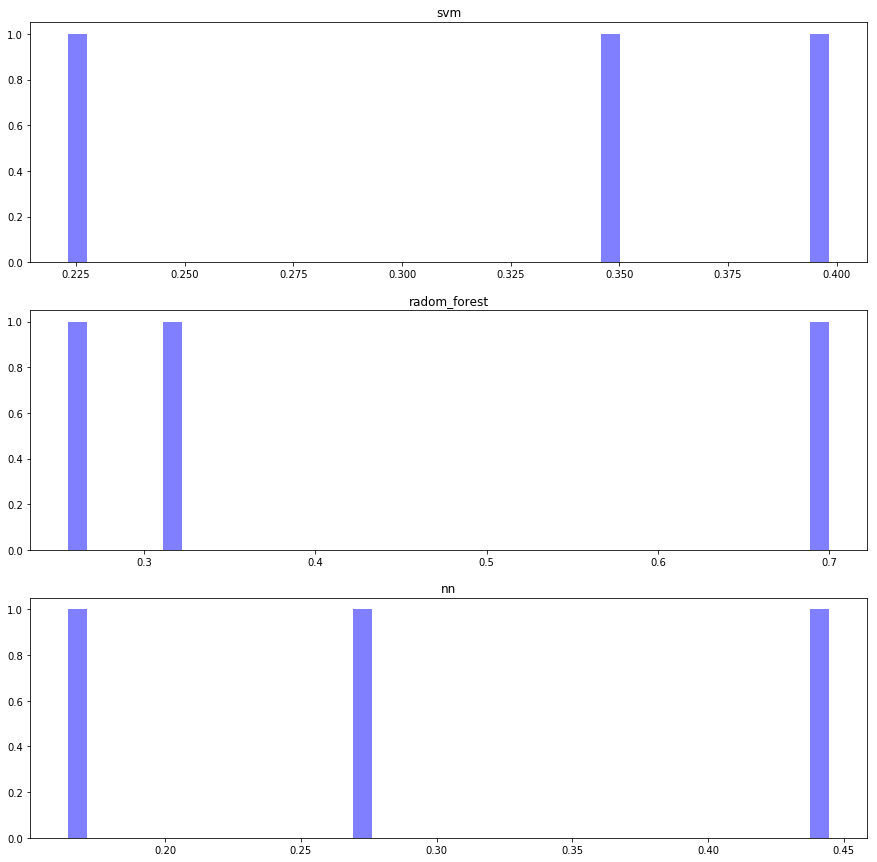

In [55]:
# tring to preform a regression to the mean of the level of violance
mean_violence=final_df_rad.loc[:,violence_labels].mean(axis=1)
regression_estimation(radio_values.values,mean_violence.values,TEST_VALUE)


----------classification------
svm_ovo - mean accuracy is= 0.28888888888888886
svm_ovo - avg auc score is= 48.8
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.3111111111111111
svm_ovr - avg auc score is= 44.6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.26666666666666666
radom_forest - avg auc score is= 35.4
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.2444444444444444
nn - avg auc score is= 37.9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


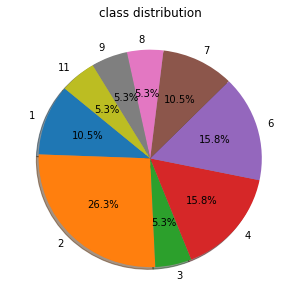

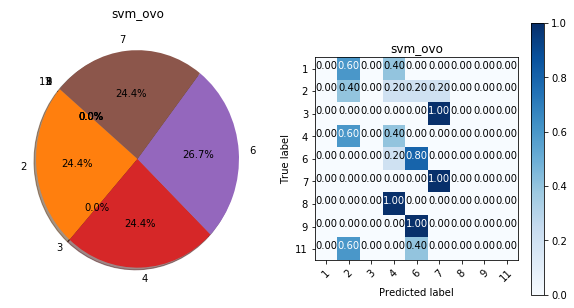

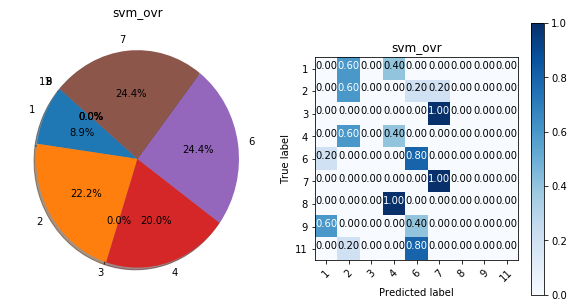

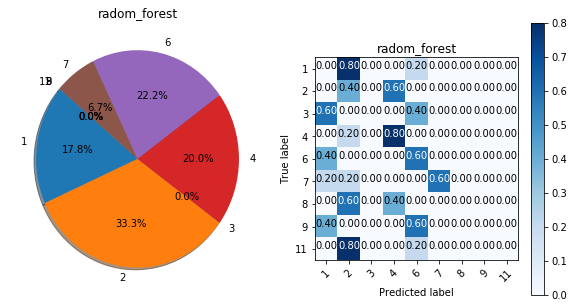

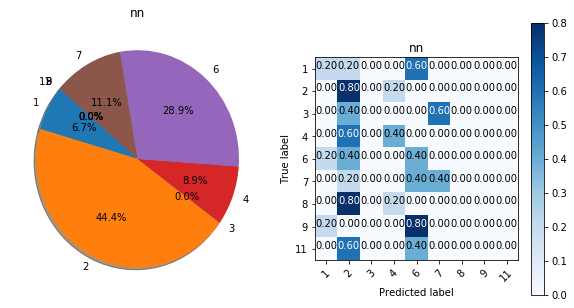

In [56]:
classification_estimation(radio_values.values,np.round(mean_violence.map(lambda x: x*10)).values,TEST_VALUE)
